# 중간발표 자료 작성을 위한 데이터 파악

1. 최초 수집 데이터 파악

In [6]:
import pandas as pd

df1 = pd.read_csv('data/data_cnt/별도기업72_최초.csv', encoding = 'cp949')
df2 = pd.read_csv('data/data_cnt/연결기업72_최초.csv', encoding = 'cp949')
df3 = pd.read_csv('data/data_cnt/케이갭71_최초.csv', encoding = 'cp949')

In [11]:
print(df1.columns[:5])
print(df2.columns[:5])
print(df3.columns[:5])

Index(['회사명', '거래소코드', '회계년도', '통계청 한국표준산업분류 10차(대분류)', '총자본증가율(IFRS)'], dtype='object')
Index(['회사명', '거래소코드', '회계년도', '통계청 한국표준산업분류 10차(대분류)', '총자본증가율(IFRS연결)'], dtype='object')
Index(['회사명', '거래소코드', '회계년도', '통계청 한국표준산업분류 코드 10차(대분류)', '총자본증가율'], dtype='object')


In [17]:
# 파일별 데이터 개수 파악 
print("별도 기업 : ", df1.shape)
print('별도 기업 회사 수 :', df1['회사명'].nunique())
print('별도 기업 코드 수 :', df1['거래소코드'].nunique())

print('\n')
print("연결 기업 : ", df2.shape)
print('연결 기업 회사 수 :', df2['회사명'].nunique())
print('연결 기업 코드 수 :', df2['거래소코드'].nunique())

print('\n')
print("Kgaap 기업 : ", df3.shape)
print('Kgaap 기업 회사 수 :', df3['회사명'].nunique())
print('Kgaap 기업 코드 수 :', df3['거래소코드'].nunique())


별도 기업 :  (20947, 75)
별도 기업 회사 수 : 2456
별도 기업 코드 수 : 2476


연결 기업 :  (20947, 75)
연결 기업 회사 수 : 2456
연결 기업 코드 수 : 2476


Kgaap 기업 :  (20831, 74)
Kgaap 기업 회사 수 : 2388
Kgaap 기업 코드 수 : 2385


개별/연결 병합파일 데이터 파악

In [22]:
df4 = pd.read_csv('data/data_cnt/연결별도_72피처병합.csv', encoding = 'cp949')

# 데이터 프레임 결측치 개수 확인
print('shape :', df4.shape)
df4.head()

shape : (18981, 76)


,Unnamed: 0,회사명,거래소코드,회계년도,상장일,상장폐지일,업종,총자본증가율,정상영업이익증가율,순이익증가율,...,총자본회전률,자기자본회전률,타인자본회전률,유동자산회전률,당좌자산회전률,재고자산회전률,매출채권회전률,순운전자본회전률,운전자본회전률,유형자산회전율
0,0,(주)CMG제약,58820,2011/12,2001/08/31,NaN,제조업,2.89,0.00,0.00,...,0.65,0.97,2.01,1.25,1.56,6.42,2.45,0.86,0.00,1.77
1,1,(주)CMG제약,58820,2012/12,2001/08/31,NaN,제조업,106.87,0.00,0.00,...,0.38,0.65,0.94,0.52,0.57,5.71,1.85,0.42,0.00,1.71
2,2,(주)CMG제약,58820,2013/12,2001/08/31,NaN,제조업,-1.80,0.00,0.00,...,0.36,0.50,1.26,0.48,0.52,5.37,2.06,0.42,0.80,2.03
3,3,(주)CMG제약,58820,2014/12,2001/08/31,NaN,제조업,3.87,-45.78,-48.84,...,0.40,0.46,2.85,0.68,0.80,4.77,1.86,0.56,0.74,1.54
4,4,(주)CMG제약,58820,2015/12,2001/08/31,NaN,제조업,-2.64,0.00,0.00,...,0.47,0.56,2.88,0.99,1.22,5.22,2.10,0.75,0.60,1.48


이상치 처리 전 결측치 시각화

In [26]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
df4.columns

Index(['Unnamed: 0', '회사명', '거래소코드', '회계년도', '상장일', '상장폐지일', '업종', '총자본증가율',
       '정상영업이익증가율', '순이익증가율', '자기자본증가율', '매출액증가율', '종업원수증가율', '유형자산증가율',
       '유동자산증가율', '재고자산증가율', '자기자본구성비율', '유동비율', '당좌비율', '현금비율',
       '재고자산 대 순운전자본비율', '매출채권 대 매입채무비율', '부채비율', '이자보상배율', 'CASH FLOW 대 부채비율',
       'CASH FLOW 대 차입금비율', 'CASH FLOW 대 총자본비율', 'CASH FLOW 대 매출액비율',
       '유동자산구성비율', '재고자산 대 유동자산비율', '타인자본구성비율', '자기자본배율', '매출채권비율', '유동부채비율',
       '단기차입금 대 총차입금비율', '차입금의존도', '차입금비율', '종업원1인당 부가가치', '노동장비율', '기계장비율',
       '자본집약도', '총자본투자효율', '설비투자효율', '기계투자효율', '부가가치율', '노동소득분배율', '매출액총이익률',
       '매출액정상영업이익률', '매출액순이익률', '총자본순이익률', '총자본정상영업이익률', '자기자본정상영업이익률',
       '자기자본순이익률', '금융비용부담률', '수지비율', '사내유보 대 자기자본비율', '1주당매출액', '1주당순이익',
       '1주당 CASH FLOW', '1주당순자산', '유보율', '금융손익비율', '매출원가 대 매출액비율', '이자부담률',
       '지급이자율', '차입금평균이자율', '총자본회전률', '자기자본회전률', '타인자본회전률', '유동자산회전률',
       '당좌자산회전률', '재고자산회전률', '매출채권회전률', '순운전자본회전률', '운전자본회전률', '유형자산회전율'],
      dtype='object')

In [38]:
# 시각화할 컬럼만 새로운 변수로 지정
df4_1 = df4[['거래소코드','총자본증가율',
       '정상영업이익증가율', '순이익증가율', '자기자본증가율', '매출액증가율', '종업원수증가율', '유형자산증가율',
       '유동자산증가율', '재고자산증가율', '자기자본구성비율', '유동비율', '당좌비율', '현금비율',
       '재고자산 대 순운전자본비율', '매출채권 대 매입채무비율', '부채비율', '이자보상배율', 'CASH FLOW 대 부채비율',
       'CASH FLOW 대 차입금비율', 'CASH FLOW 대 총자본비율', 'CASH FLOW 대 매출액비율',
       '유동자산구성비율', '재고자산 대 유동자산비율', '타인자본구성비율', '자기자본배율', '매출채권비율', '유동부채비율',
       '단기차입금 대 총차입금비율', '차입금의존도', '차입금비율', '종업원1인당 부가가치', '노동장비율', '기계장비율',
       '자본집약도', '총자본투자효율', '설비투자효율', '기계투자효율', '부가가치율', '노동소득분배율', '매출액총이익률',
       '매출액정상영업이익률', '매출액순이익률', '총자본순이익률', '총자본정상영업이익률', '자기자본정상영업이익률',
       '자기자본순이익률', '금융비용부담률', '수지비율', '사내유보 대 자기자본비율', '1주당매출액', '1주당순이익',
       '1주당 CASH FLOW', '1주당순자산', '유보율', '금융손익비율', '매출원가 대 매출액비율', '이자부담률',
       '지급이자율', '차입금평균이자율', '총자본회전률', '자기자본회전률', '타인자본회전률', '유동자산회전률',
       '당좌자산회전률', '재고자산회전률', '매출채권회전률', '순운전자본회전률', '운전자본회전률', '유형자산회전율']]

# 자료 상 0 값을 모두 NaN 으로 변환
df4_1 = df4_1.replace(0, np.NaN)

<AxesSubplot:>

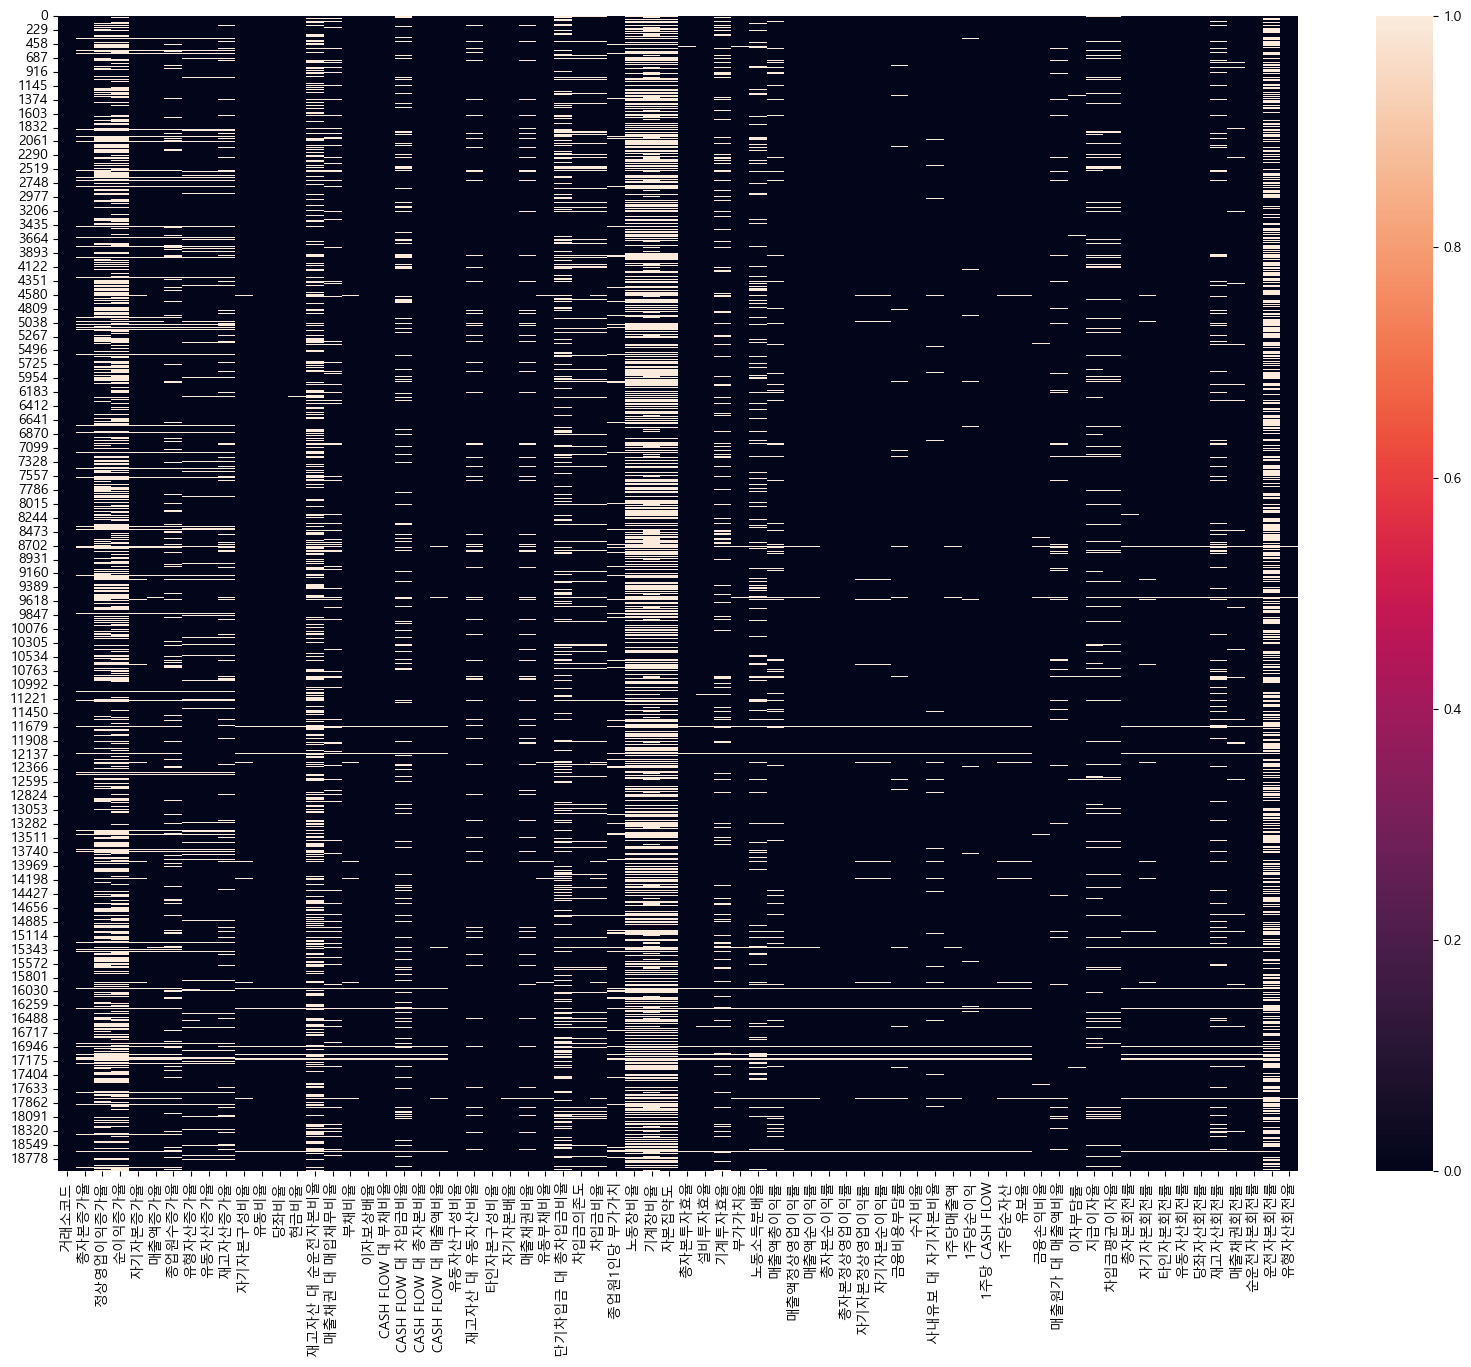

In [43]:
# 결측치 히트맵
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "Malgun Gothic"

plt.figure(figsize=(20, 15))

sns.heatmap(df4_1.isna())